In [9]:
import numpy as np
import matplotlib.pyplot as plt
file = 'ESP32_Adv_sampling_rate_56.0_gain_40_fc_2415.0.iq'
samples = np.fromfile(file, np.complex64) # Read in file.  We have to tell it what format it is
# THRESHOLD = 0.01
print(len(samples))
# THRESHOLD = 0.05
# zeros = np.abs(samples)<THRESHOLD
# samples[zeros] = 0

Fs = 56e6


8009013


In [10]:
from itertools import groupby
from operator import itemgetter

def frameFinder(samples):
    test_list = np.nonzero(samples)
    framesIndex = []
    for k, g in groupby(enumerate(test_list[0]), lambda ix: ix[0]-ix[1]):
        temp = list(map(itemgetter(1), g))
        if len(temp)< 1000:
            continue
        framesIndex.append([temp[0],temp[-1]])
    return np.array(framesIndex)

        

TotalFramesIndex = frameFinder(samples)
len(TotalFramesIndex)

655

/tmp/ipykernel_4072/4092095246.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 3), dpi=50)


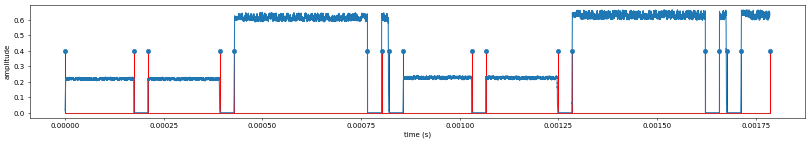

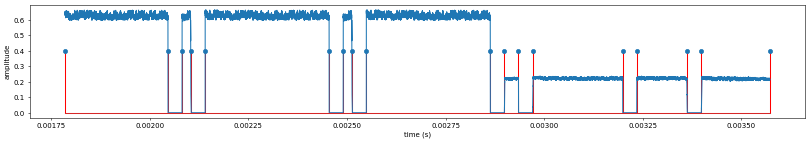

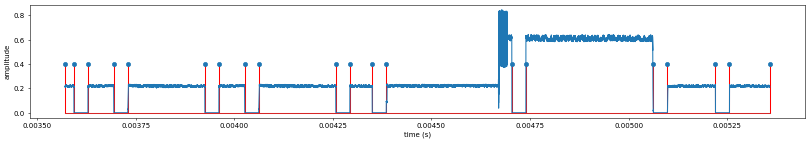

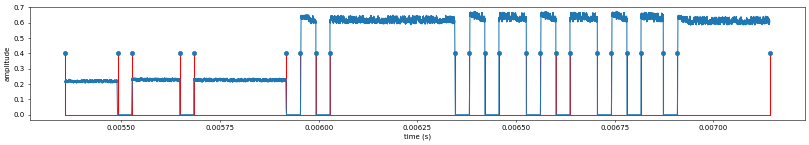

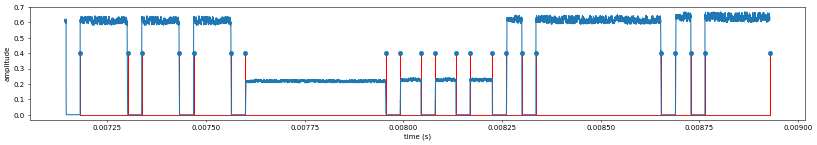

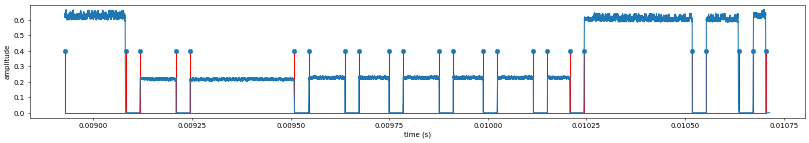

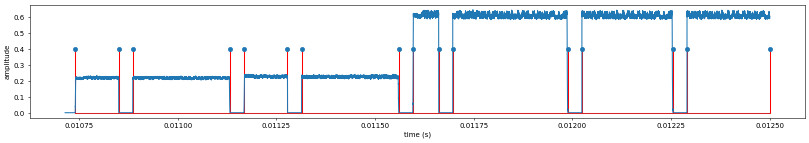

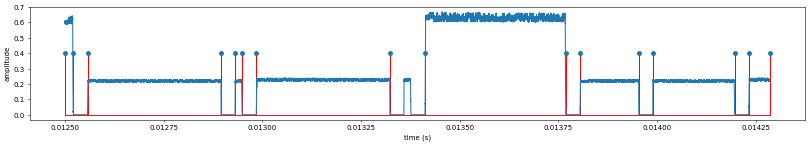

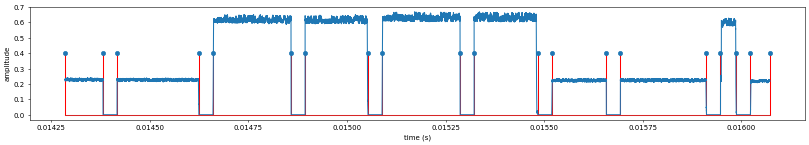

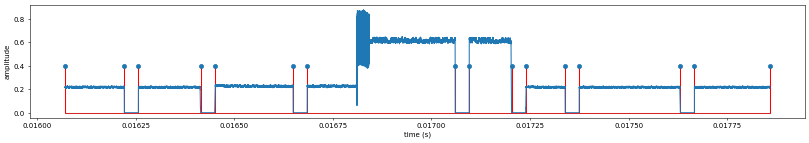

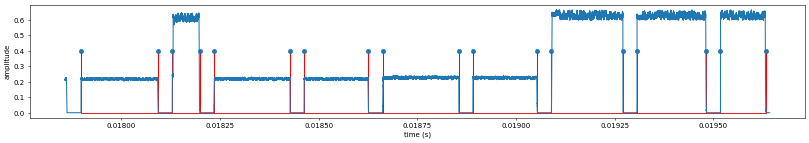

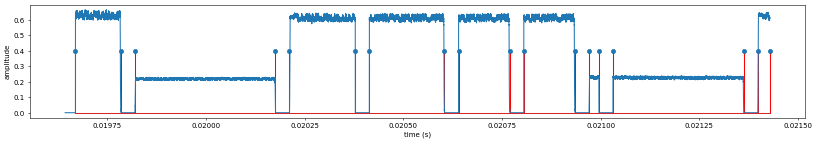

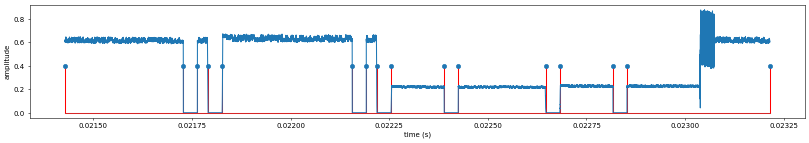

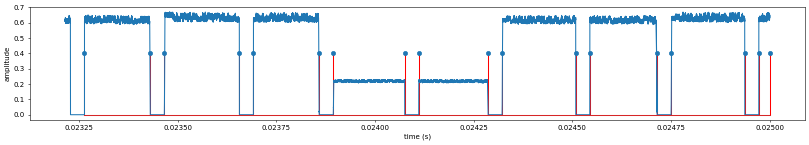

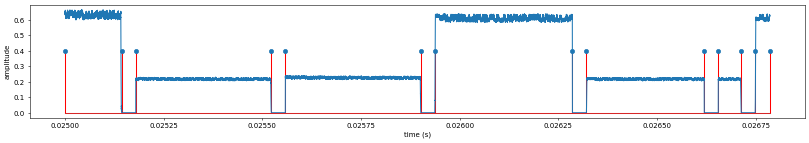

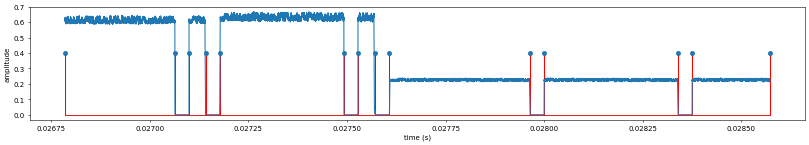

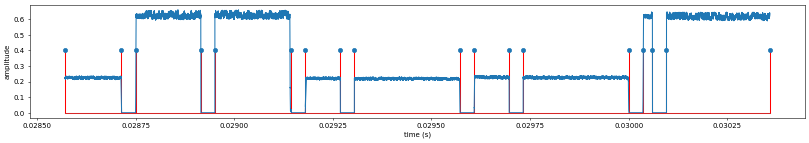

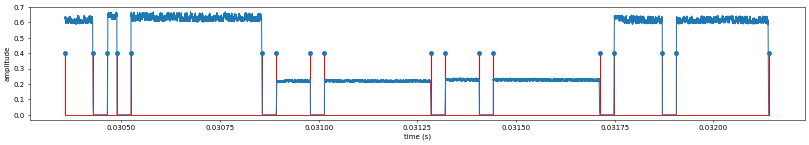

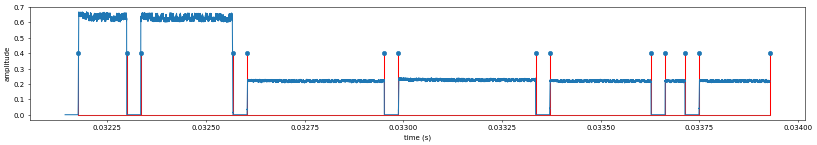

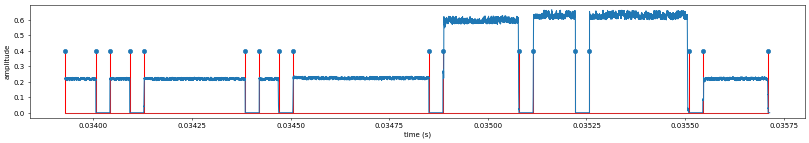

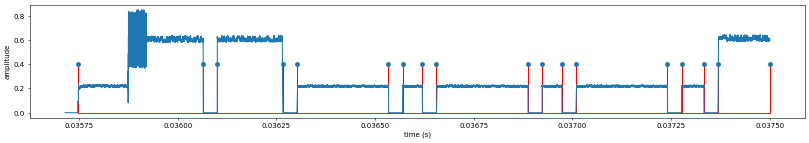

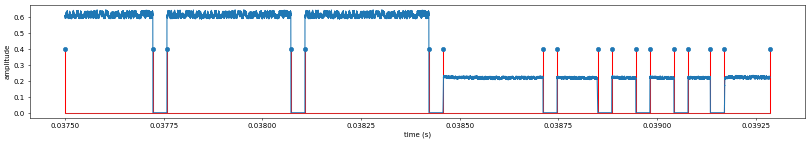

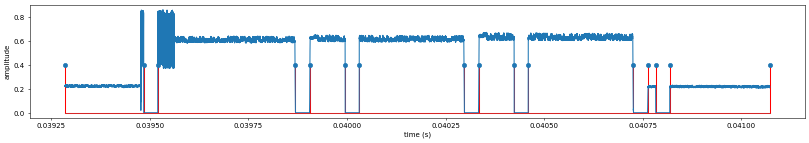

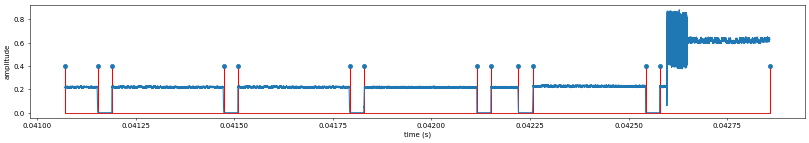

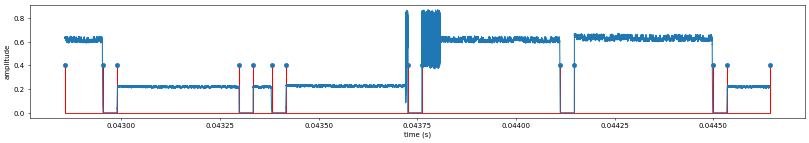

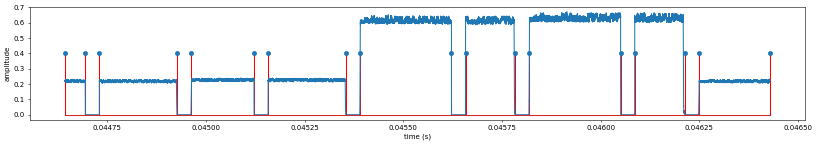

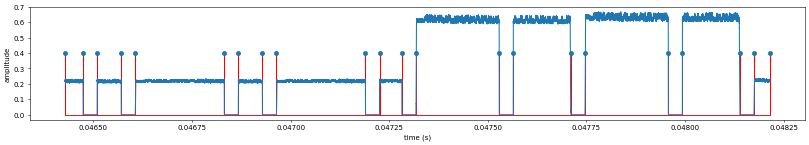

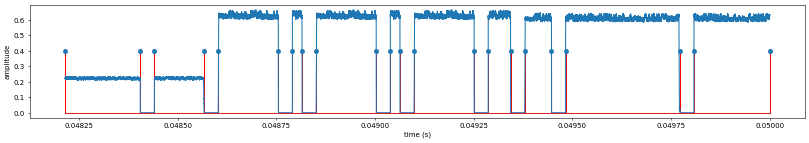

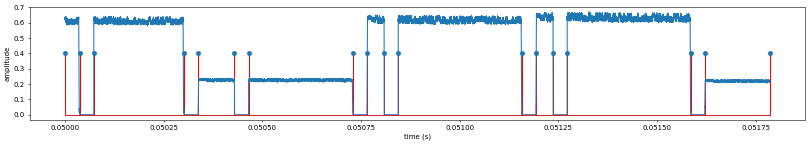

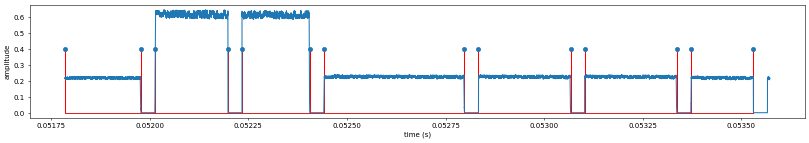

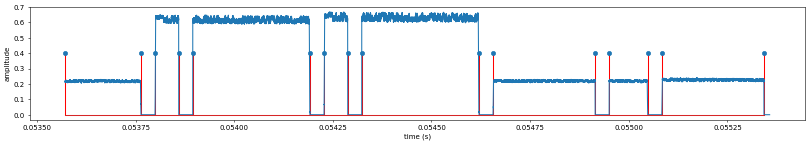

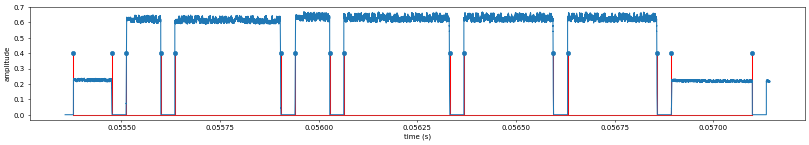

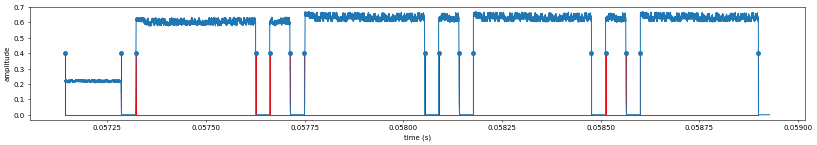

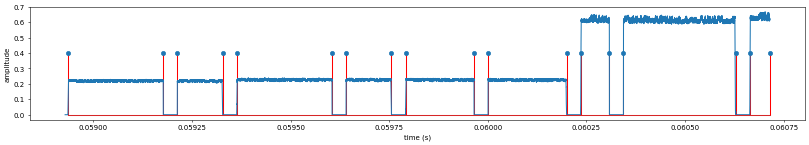

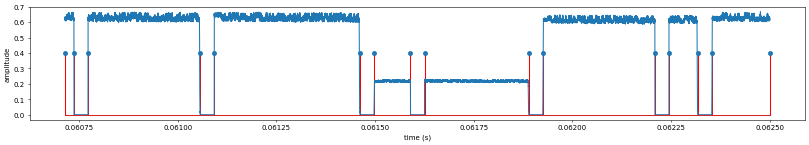

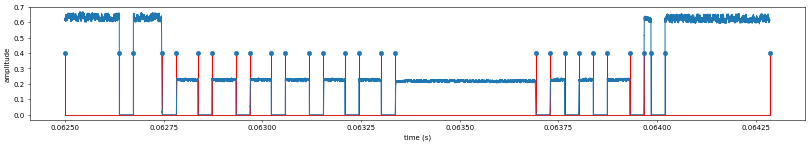

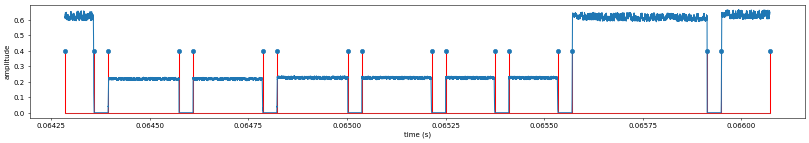

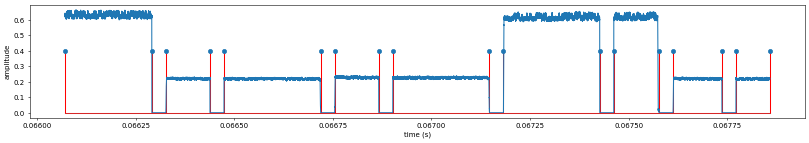

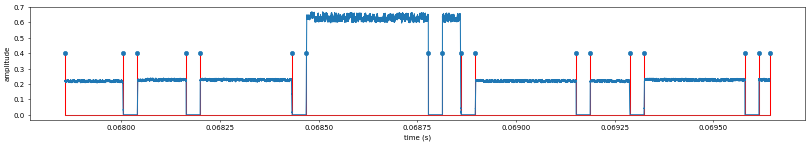

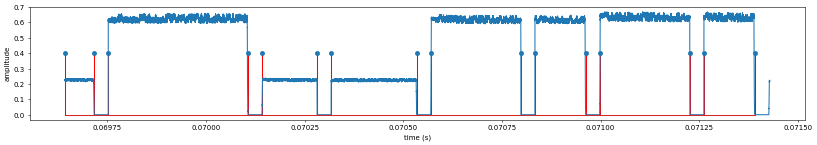

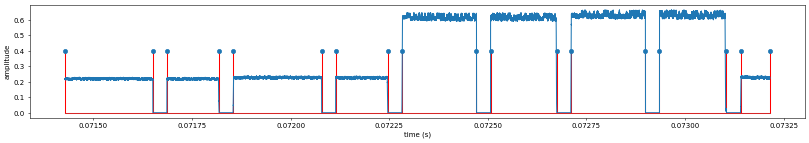

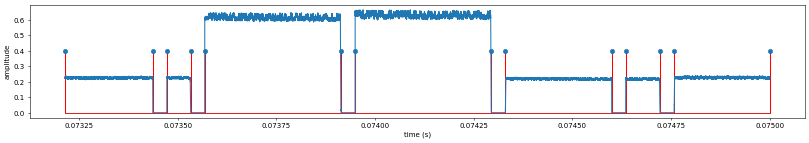

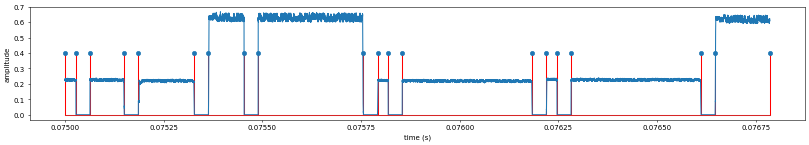

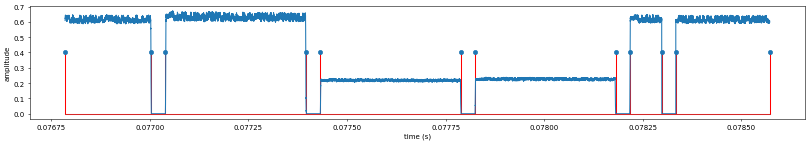

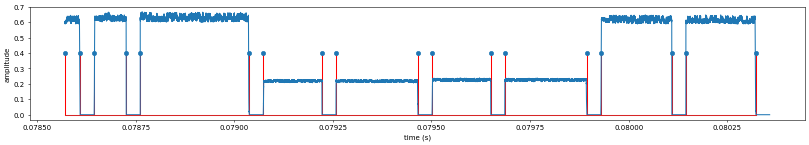

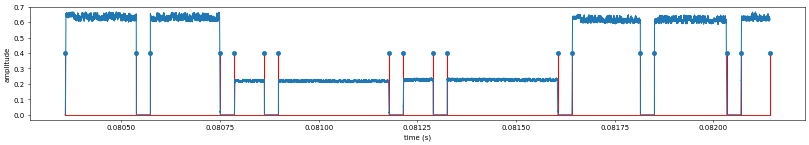

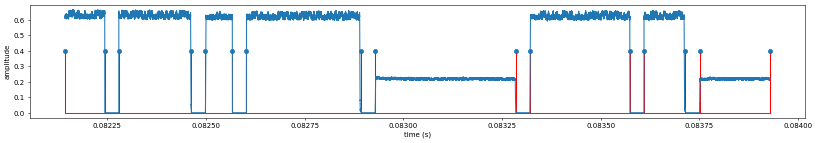

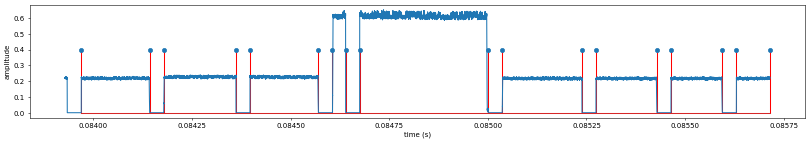

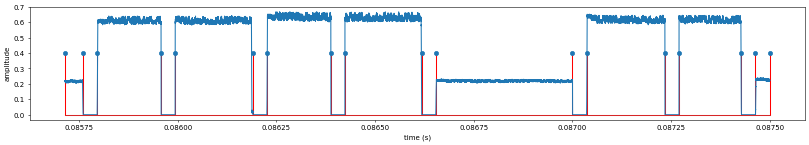

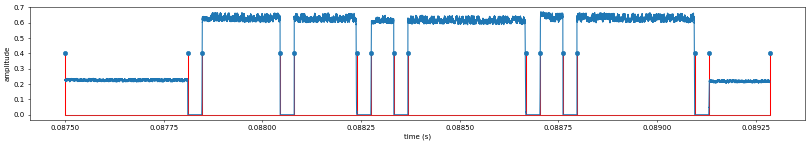

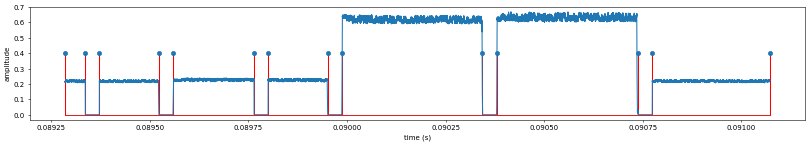

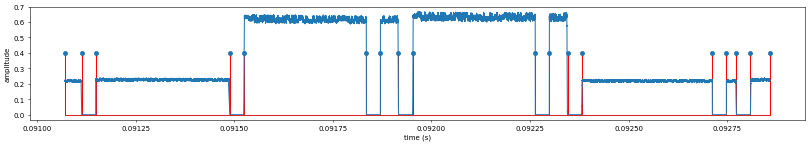

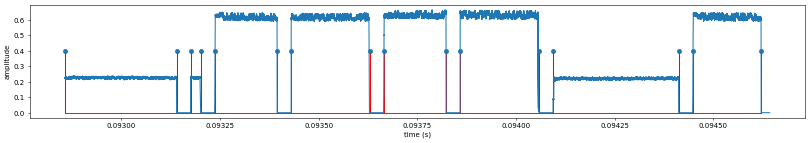

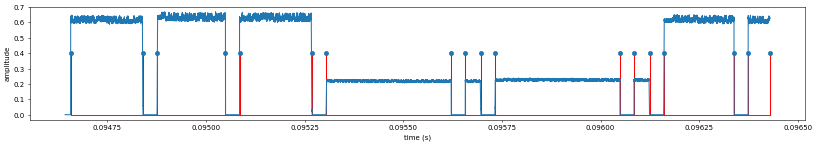

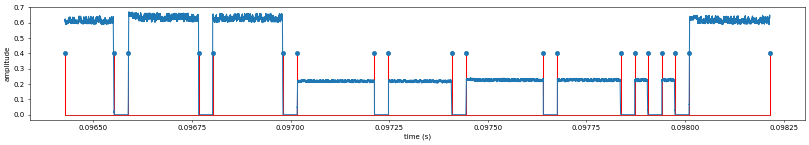

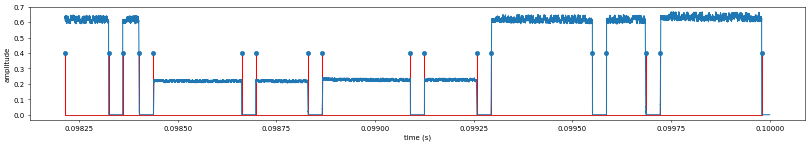

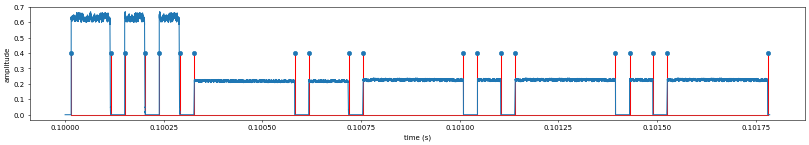

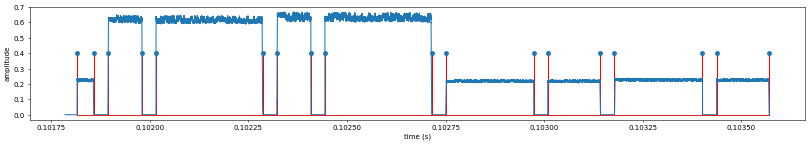

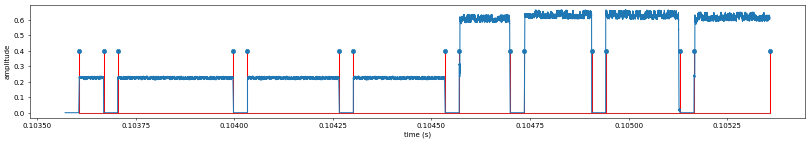

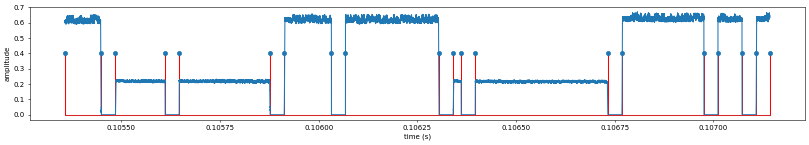

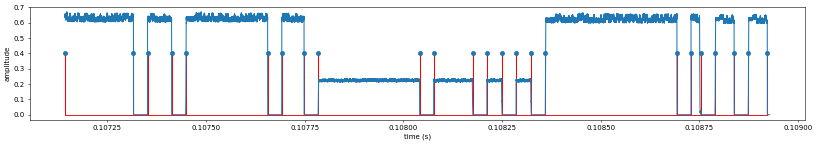

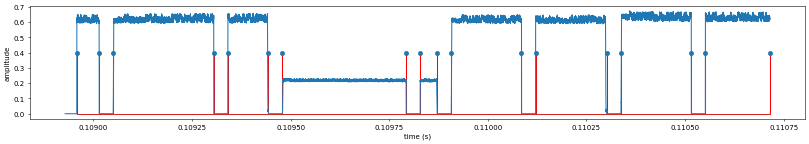

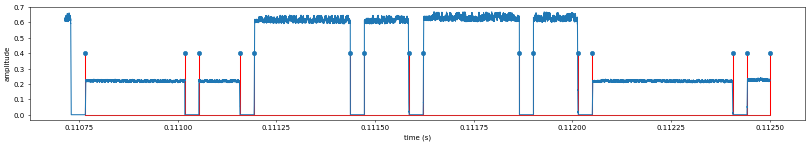

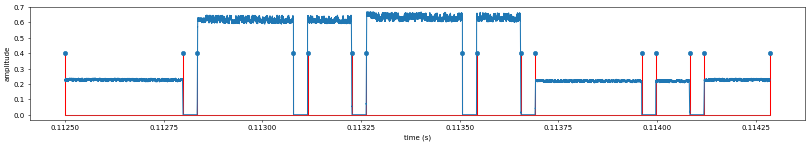

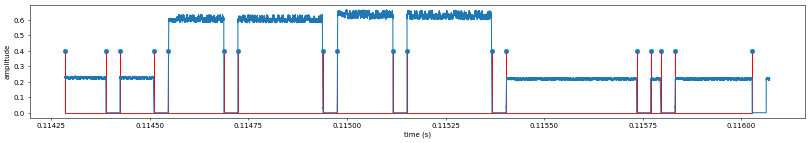

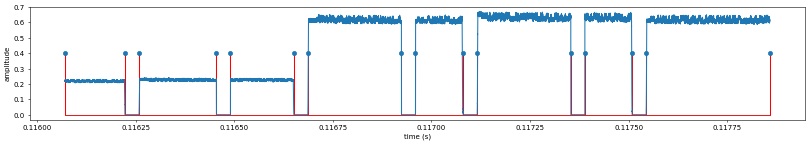

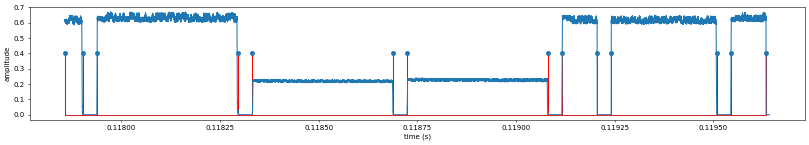

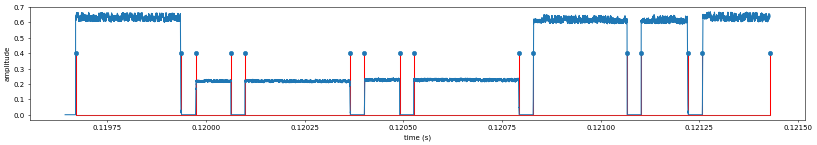

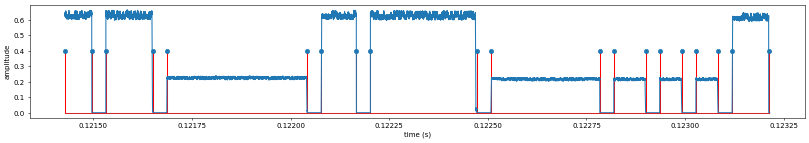

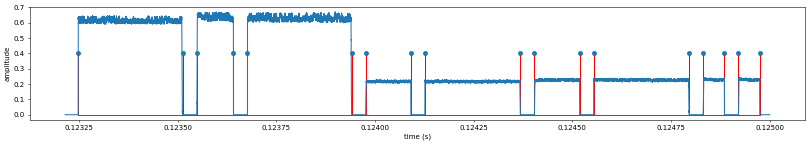

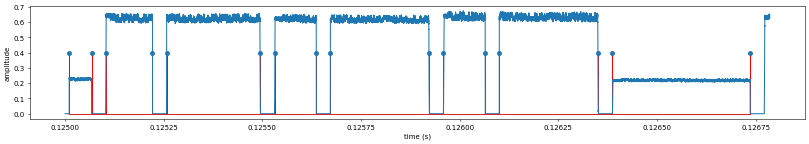

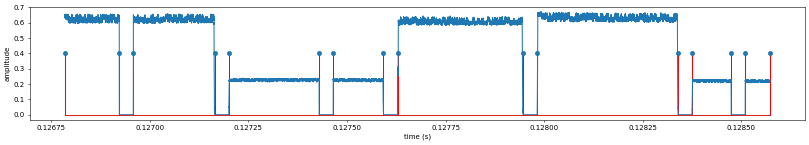

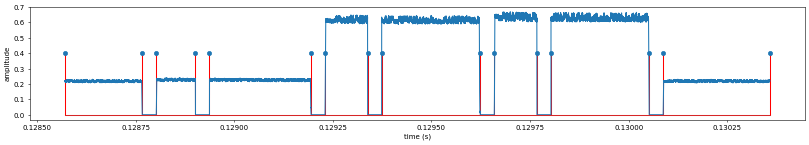

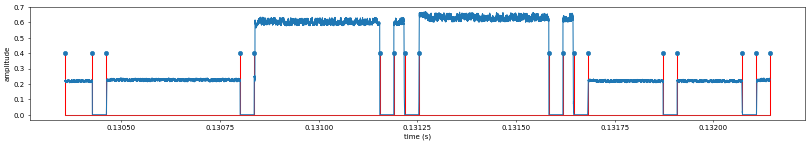

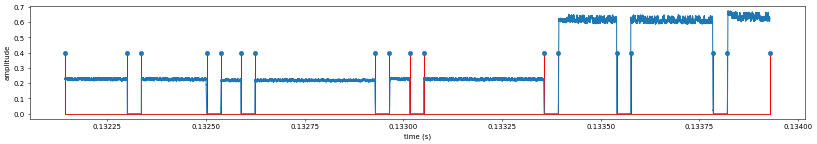

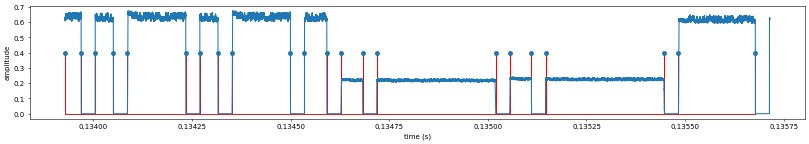

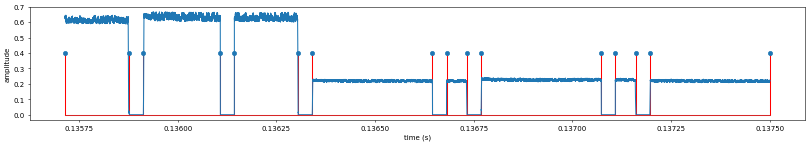

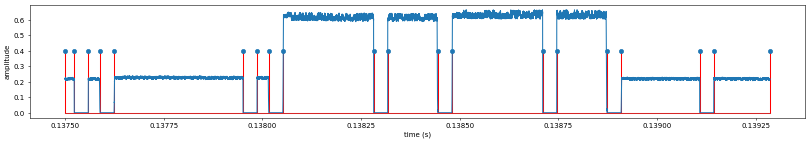

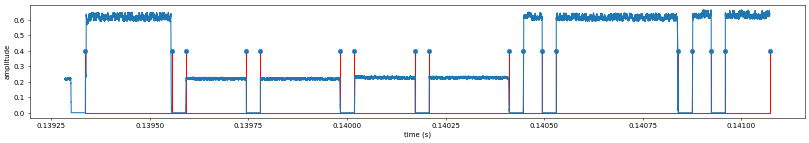

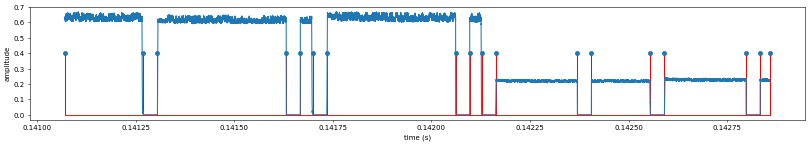

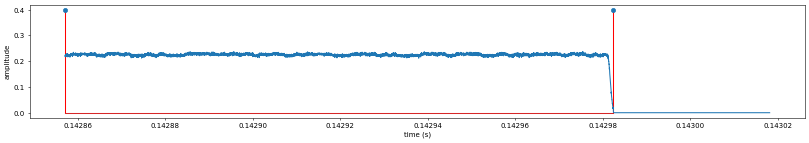

In [11]:
batchAna = 100000
start = 0 
for i in range(len(samples)//batchAna+1):
    x = samples[start:start + batchAna]
    framesIndex = frameFinder(x)
    plt.figure(figsize=(20, 3), dpi=50)
    plt.plot(np.linspace(start,  start+len(x), len(x))/Fs,np.abs(x))
    
    try: 
        plt.stem(np.add(framesIndex.flatten(),[start]*len(framesIndex)*2)/Fs, [.4]*len(framesIndex.flatten()) ,'r')
    except:
        start += batchAna
        continue
    start += batchAna
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    # # lt.grid(True)
    
plt.show()
plt.close()


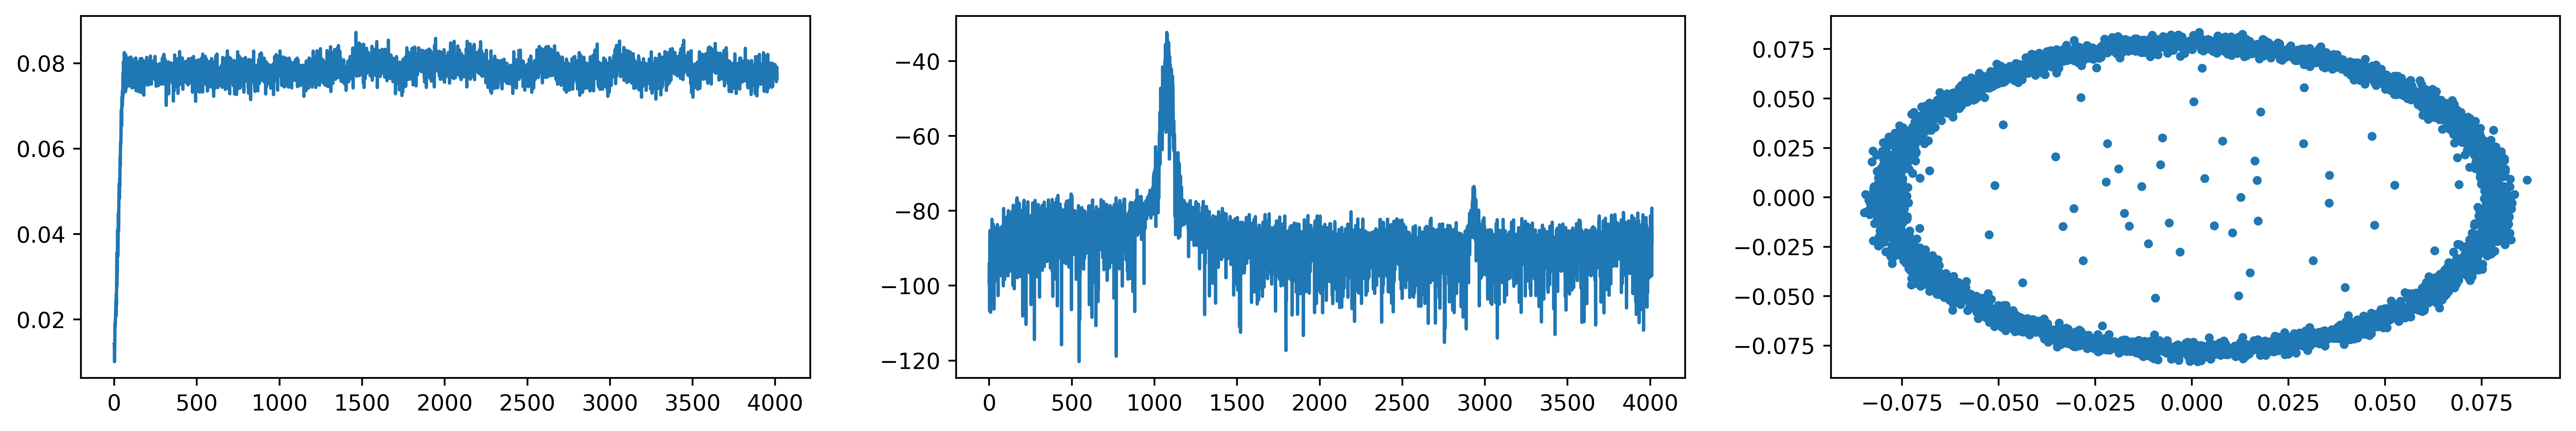

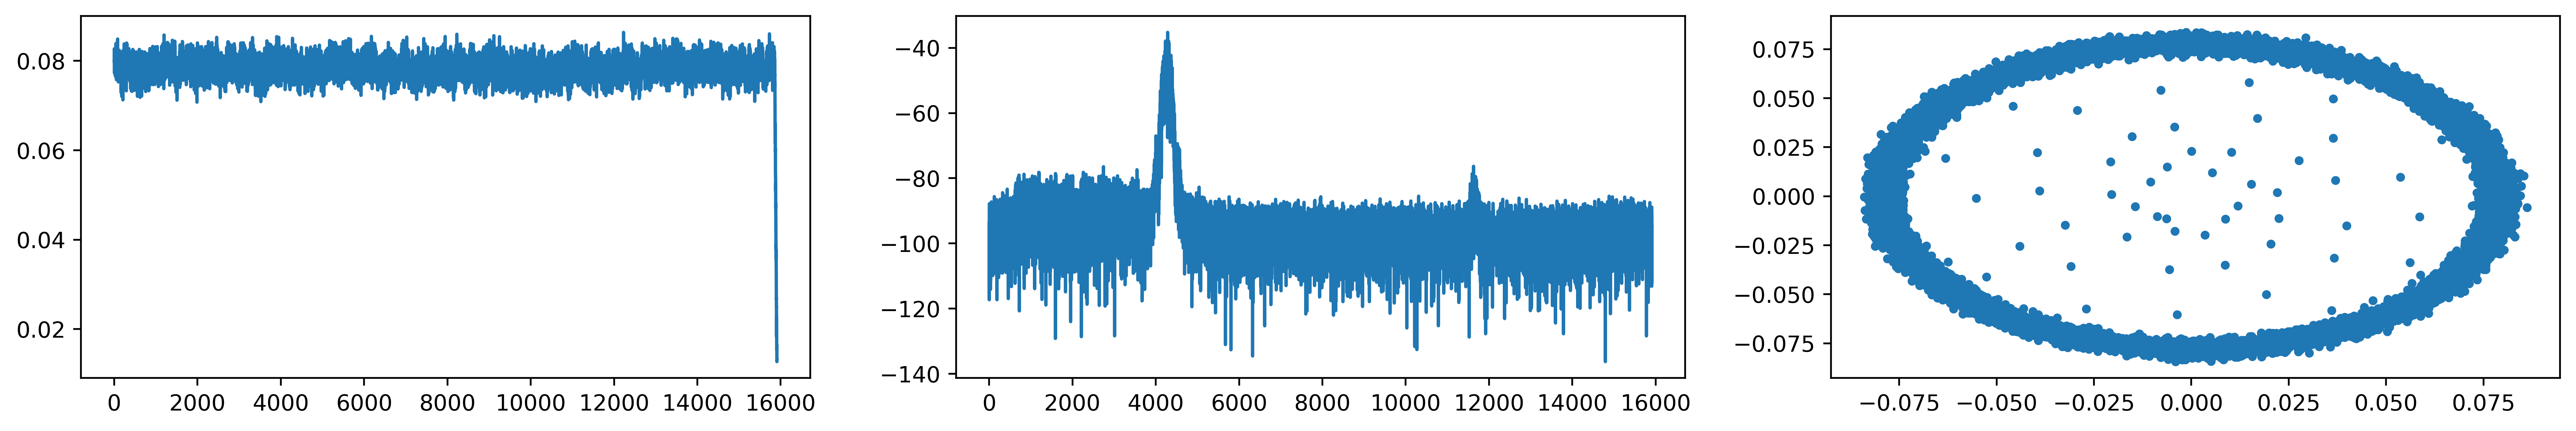

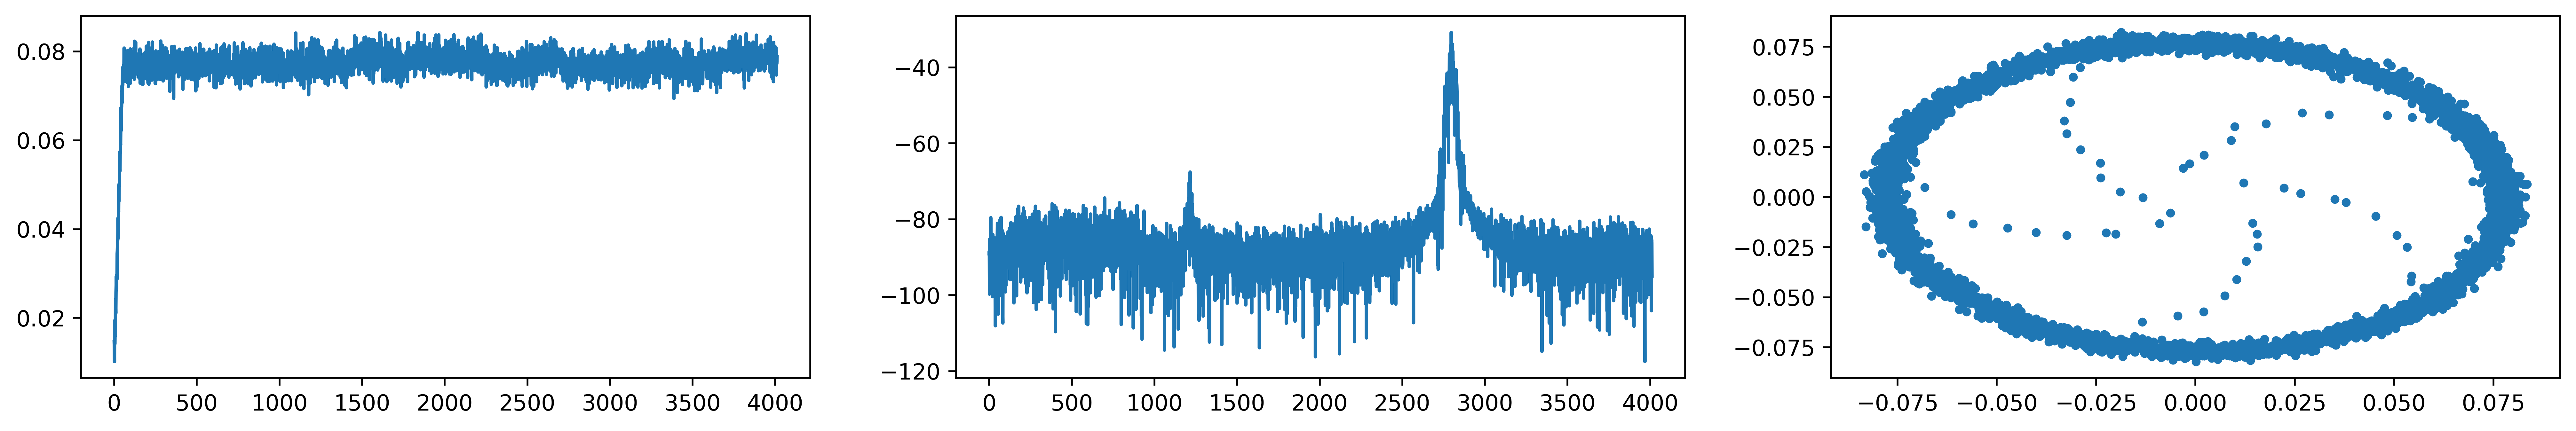

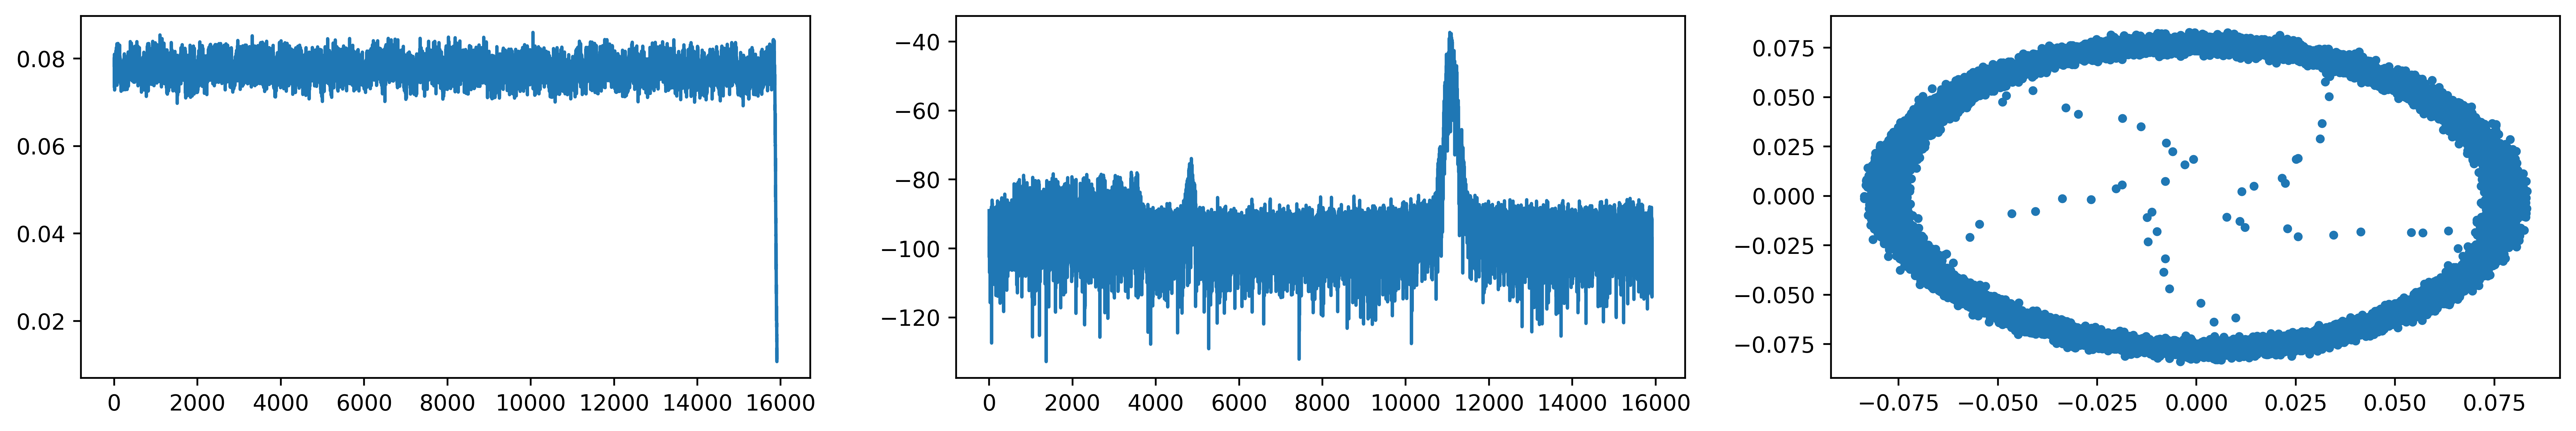

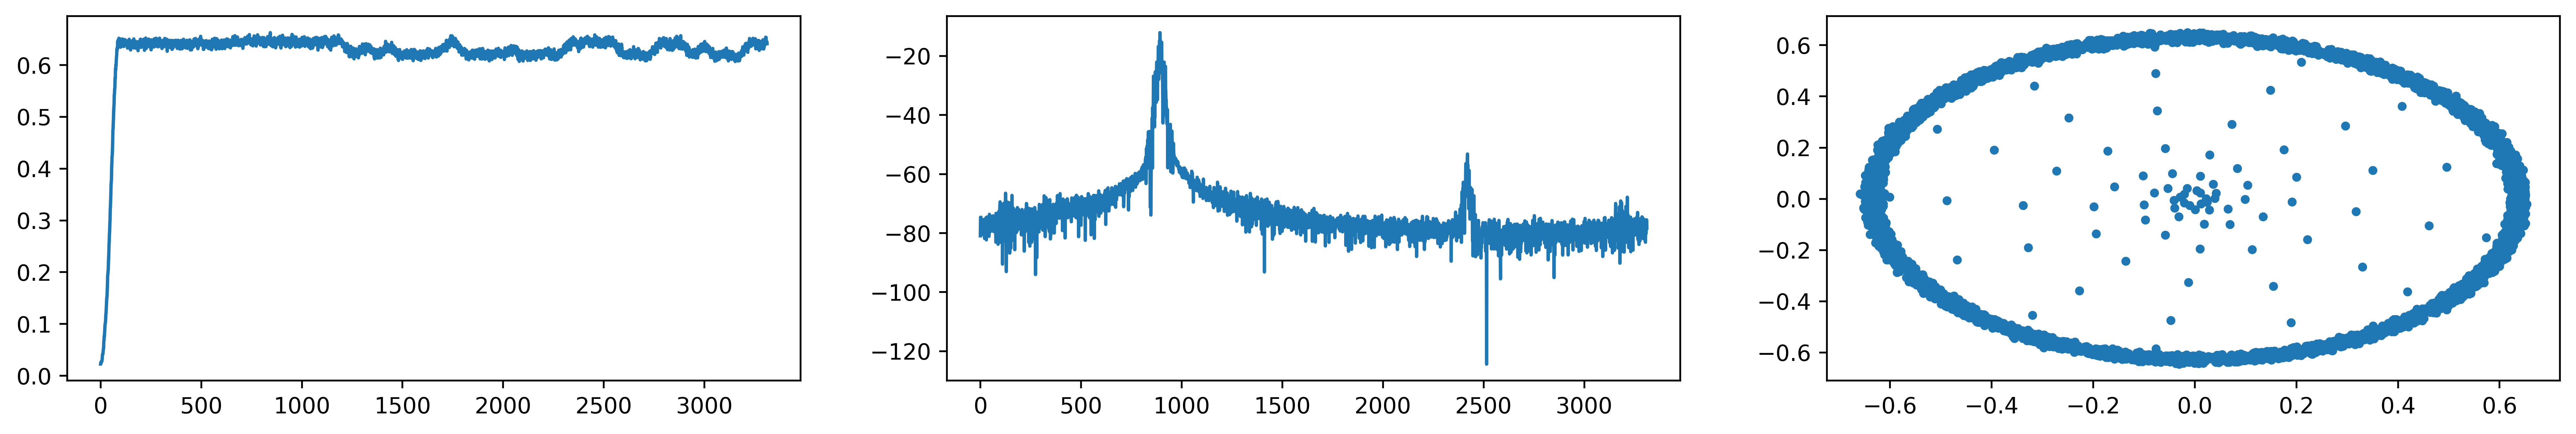

KeyboardInterrupt: 

In [ ]:

for i,j in TotalFramesIndex:
    frame = samples[i:j]
    PSD = (np.abs(np.fft.fft(frame))/len(frame))**2
    PSD_log = 10.0*np.log10(PSD)
    PSD_shifted = np.fft.fftshift(PSD_log)
    plt.figure(figsize=(20, 3), dpi=500)
    plt.subplot(1,3,1)
    plt.plot(np.abs(frame))
    plt.subplot(1,3,2)
    plt.plot(PSD_shifted)
    plt.subplot(1,3,3)
    plt.plot(np.real(frame),np.imag(frame),'.')
    plt.show()

In [ ]:
# plt.plot(abs(frames[9]))
# target = frames[9][abs(frames[9])>.6]
# # target = target[0:500]
# # plt.plot(abs(target))
# plt.show()
# plt.plot(np.real(target[500:-1]),np.imag(target[500:-1]),'.')
# plt.plot(np.real(target[0:500]),np.imag(target[0:500]),'.')
# plt.show()
# window = 512
# for i in range(4000//window):
#     PSD = (np.abs(np.fft.fft(target[window*i:window*i + window]))/len(target[window*i:window*i + window]))**2
#     PSD_log = 10.0*np.log10(PSD)
#     PSD_shifted = np.fft.fftshift(PSD_log)
#     plt.plot(PSD_shifted)
#     plt.title(str(np.where(PSD_shifted == np.max(PSD_shifted))))
#     plt.show()


